## data cleaning

In [1]:
import pandas
import numpy
import os
import warnings
import matplotlib.pyplot as mpl
from sklearn.preprocessing import OneHotEncoder, minmax_scale
from sklearn.model_selection import train_test_split
warnings.simplefilter(action='ignore', category=Warning)


In [2]:
path="C:/Users/windows 10/Documents/FL/source_code/ClientSide/Data/"
listdir = os.listdir("C:/Users/windows 10/Documents/FL/source_code/ClientSide/Data")
listdir.remove('Thuesday-20-02-2018_TrafficForML_CICFlowMeter-001.csv')

In [3]:
features = numpy.load("C:/Users/windows 10/Documents/FL/source_code/ClientSide/Scripts/data_processing/guidePreproc/features.npy")
features = list(features)

In [4]:
# interger and float columns identification

integer_cols = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
                'Fwd Pkt Len Min', 'Bwd Pkt Len Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 
                'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt', 
                'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 
                'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
                'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 
                'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
                'Active Max','Active Min','Idle Max','Idle Min','TotLen Bwd Pkts', 'Flow IAT Max','Flow IAT Min','Fwd IAT Tot',
                'Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Max','Bwd IAT Min']

float_cols = ["Fwd Pkt Len Mean","Fwd Pkt Len Std","Bwd Pkt Len Mean","Bwd Pkt Len Std","Flow Byts/s","Flow Pkts/s",
              "Flow IAT Mean","Flow IAT Std","Fwd IAT Mean","Fwd IAT Std","Bwd IAT Mean","Bwd IAT Std","Fwd Pkts/s",
              "Bwd Pkts/s","Pkt Len Mean","Pkt Len Std","Pkt Len Var","Pkt Size Avg","Fwd Seg Size Avg",
              "Bwd Seg Size Avg","Active Mean","Active Std","Idle Mean","Idle Std"]

In [5]:
def preprocessing(df) :
    data=df.copy()
    
    for col in integer_cols:
        data[col] = pandas.to_numeric(data[col], errors='coerce')
    
    data = data.dropna()
    data[integer_cols] = data[integer_cols].astype('int64')
    
    for col in float_cols:
        data[col] = pandas.to_numeric(data[col], errors='coerce')
       
    data = data.dropna()
    data[float_cols] = data[float_cols].astype('float64')
    
    # Drop rows with invalid data
    data.replace([numpy.inf, -numpy.inf], numpy.nan, inplace=True)
    data = data.dropna()
    
    data["Label"] = numpy.where(data["Label"] != "Benign", 'INTRUSION','NORMAL')
    data['Label'] = data.Label.astype('category')
    data = data.drop_duplicates()

    # Drop duplicate rows
    data = data.drop_duplicates(subset=data.columns.difference(['Label', 'Timestamp']))
    data = data.drop(["Timestamp"], axis=1)
    
    return data

In [6]:
dataset = pandas.DataFrame([],columns=features)

for file in listdir :
    print(f"processing file {file}")
    data = pandas.read_csv(f"{path}{file}")
    dataset = pandas.concat([dataset, preprocessing(data)])

processing file Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
processing file Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
processing file Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
processing file Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
processing file Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
processing file Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
processing file Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
processing file Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
processing file Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


In [7]:
dataset = dataset.drop_duplicates()

In [8]:
dataset[integer_cols] = dataset[integer_cols].apply(pandas.to_numeric, errors='coerce', downcast='integer')
dataset[float_cols] = dataset[float_cols].apply(pandas.to_numeric, errors='coerce', downcast='float')

In [9]:
dataset.columns = [col.lower().replace(" ", "_") for col in dataset.columns]

In [10]:
print(dataset["label"].value_counts())
print(f"shape: {dataset.shape}\n")

label
NORMAL       5075464
INTRUSION     766423
Name: count, dtype: int64
shape: (5841887, 79)



In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841887 entries, 0 to 5841886
Data columns (total 79 columns):
 #   Column             Dtype   
---  ------             -----   
 0   dst_port           int32   
 1   protocol           int8    
 2   flow_duration      int64   
 3   tot_fwd_pkts       int32   
 4   tot_bwd_pkts       int32   
 5   totlen_fwd_pkts    int32   
 6   totlen_bwd_pkts    int32   
 7   fwd_pkt_len_max    int32   
 8   fwd_pkt_len_min    int16   
 9   fwd_pkt_len_mean   float64 
 10  fwd_pkt_len_std    float64 
 11  bwd_pkt_len_max    int32   
 12  bwd_pkt_len_min    int16   
 13  bwd_pkt_len_mean   float64 
 14  bwd_pkt_len_std    float32 
 15  flow_byts/s        float64 
 16  flow_pkts/s        float64 
 17  flow_iat_mean      float64 
 18  flow_iat_std       float64 
 19  flow_iat_max       int64   
 20  flow_iat_min       int64   
 21  fwd_iat_tot        int64   
 22  fwd_iat_mean       float64 
 23  fwd_iat_std        float64 
 24  fwd_iat_max        int64

## feature selection

In [ ]:
null_variance_cols = ["bwd_psh_flags","bwd_urg_flags",
                      "fwd_byts/b_avg","fwd_pkts/b_avg","fwd_blk_rate_avg",
                      "bwd_byts/b_avg","bwd_pkts/b_avg","bwd_blk_rate_avg"]
dataset = dataset.drop(null_variance_cols, axis=1)

In [13]:
corr = dataset.drop(["label"], axis=1).corr()
corr = corr.apply(abs)

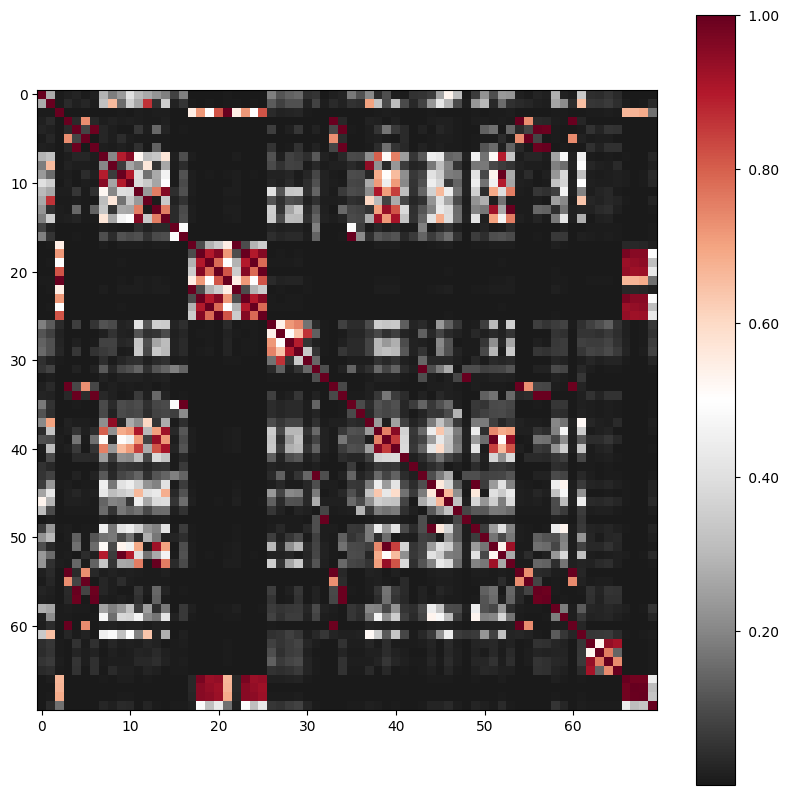

In [14]:
fig, ax = mpl.subplots(figsize=(10,10))
im = ax.imshow(corr, cmap='RdGy_r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
mpl.show()

In [20]:
n=0
for i in range(70):
    for j in range(i, 70):
        if i == j :
            continue
        if corr.iloc[i,j] > .99 :
            n+=1
            print((n, dataset.columns[i], dataset.columns[j], corr.iloc[i,j]))

(1, 'flow_duration', 'fwd_iat_tot', 0.9999925613265617)
(2, 'tot_fwd_pkts', 'fwd_header_len', 0.9949998350357291)
(3, 'tot_fwd_pkts', 'subflow_fwd_pkts', 1.0)
(4, 'tot_fwd_pkts', 'fwd_act_data_pkts', 0.999322660066321)
(5, 'tot_bwd_pkts', 'totlen_bwd_pkts', 0.9911236966221492)
(6, 'tot_bwd_pkts', 'bwd_header_len', 0.9960393211280267)
(7, 'tot_bwd_pkts', 'subflow_bwd_pkts', 1.0)
(8, 'tot_bwd_pkts', 'subflow_bwd_byts', 0.9911248644182601)
(9, 'totlen_fwd_pkts', 'subflow_fwd_byts', 1.0)
(10, 'totlen_bwd_pkts', 'bwd_header_len', 0.9958505724430988)
(11, 'totlen_bwd_pkts', 'subflow_bwd_pkts', 0.9911236966221492)
(12, 'totlen_bwd_pkts', 'subflow_bwd_byts', 0.9999997040314977)
(13, 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 0.9999999999999999)
(14, 'bwd_pkt_len_mean', 'bwd_seg_size_avg', 1.0)
(15, 'flow_pkts/s', 'fwd_pkts/s', 0.9933025778450258)
(16, 'flow_iat_mean', 'fwd_iat_mean', 0.9999794268195006)
(17, 'flow_iat_std', 'fwd_iat_std', 0.9999890190092436)
(18, 'flow_iat_max', 'fwd_iat_max', 0.

In [21]:
dataset = dataset.drop(['subflow_fwd_pkts','subflow_bwd_pkts','subflow_fwd_byts',
                        'bwd_seg_size_avg','syn_flag_cnt','cwe_flag_count',
                        'fwd_header_len','tot_fwd_pkts','tot_bwd_pkts',
                        'totlen_bwd_pkts','fwd_pkt_len_mean','flow_pkts/s',
                        'flow_iat_mean','flow_iat_std','flow_iat_max',
                        'flow_iat_min','fwd_act_data_pkts','subflow_bwd_byts',
                        'bwd_header_len','pkt_size_avg','rst_flag_cnt','idle_max'], axis=1)

## scaling continuous features

In [22]:
sparse_cols = ["fwd_psh_flags","fwd_urg_flags","fin_flag_cnt",
               "psh_flag_cnt","ack_flag_cnt","urg_flag_cnt"]
non_sparse_cols = dataset.drop(sparse_cols+['dst_port', 'protocol', 'label'], axis=1).columns

In [23]:
dataset[non_sparse_cols] = minmax_scale(dataset[non_sparse_cols])

In [27]:
float_cols = dataset.select_dtypes(include='float').columns
dataset[float_cols] = dataset[float_cols].apply(pandas.to_numeric, errors='coerce', downcast='float')

## encoding labels

In [29]:
dataset['intrusion'] = (dataset['label'] == 'INTRUSION').astype(int)

# Drop the original column if needed
dataset = dataset.drop(columns=['label'])

In [16]:
dataset = pandas.get_dummies(dataset, columns=['protocol'], dtype=numpy.int8)

In [17]:
dataset['intrusion'] = dataset['intrusion'].astype('float32')

## postprocessing

In [38]:
trainset, testset = train_test_split(dataset,
                                     test_size=.20,
                                     shuffle=True,
                                     stratify=dataset['intrusion'],
                                     random_state=0)


In [39]:
trainset.to_feather(path + "train.feather")
testset.to_feather(path + "test.feather")